# Homework 2

## Introduction

### Important dates

* Homework release: Thursday, 7th November 2019
* **Homework due: Wednesday, 20th November 2019 (23:59 hours, 11:59 PM)**
* **Peer review due: Wednesday, 27th November 2019 (23:59 hours, 11:59 PM)**
* Grading release: Monday, 9th December 2019

**Some rules:**
* You are allowed to use any built-in Python library that comes with Anaconda. You should make heavy use of `sklearn`, which will save you from (re)implementing any of the classical machine learning algorithms yourself. If you want to use an external library, you have to justify your choice.
* Make sure you use the data folder provided in the repository in read-only mode.
* Be sure to provide textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
* Back up any hypotheses and claims with data, since this is an important aspect of the course.
* Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.
* Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
* **Important Note:** Owing to the scale of the datasets some tasks might take longer to finish, and hence, it is *recommended* that you start working on this homework as early as possible.

# Task A: Applied ML and Reading the Stats

## Description

You have been appointed as the manager/head-coach of Lausanne's men's football team [FC Lausanne-Sport](https://en.wikipedia.org/wiki/FC_Lausanne-Sport), and as a first step towards improving the team you decide to hire a new player. One way to assess the quality of a player would be to watch the games in which he participates. Since there are 22 players on the field, he will typically only have the ball for around 5-10 minutes per game. In addition, the ADA homework takes up all your free time, and hence, you need a more efficient and elegant solution.

You hypothesize that perhaps looking at the *physical capabilities* of the candidates such as *'running'* and *'jumping'* might be a good enough proxy for their skill as a football player. Thus, you come up with the idea of letting candidate players do just a couple of exercises such as *'100m sprint'* and *'high jump'*, and decide on one of the candidates based on his performance in these exercises. Because you are an aspiring data scientist, you want to use machine learning to optimize the player selection.

You come across a dataset of players from the football video game [FIFA 19](https://www.ea.com/games/fifa/fifa-19), which contains hand-annotated data about thousands of real-world football players, in particular about their skills in different domains.
Each row of the dataset corresponds to a player (you might recognize some of them). It contains information such as the player's nationality and their market value. However, the attributes that we are interested in are the skills of the players in various footballing aspects such as *'agility'*, *'dribbling'*, or *'heading accuracy'*. Apart from one attribute (see **A2.1.**), all of them are *non-negative* values in different bounded ranges, where a *higher value* corresponds to the *player being better* in that skill.

### A1. Getting a sense of the data

#### A1.1.
Load the data present at `data/fifa19_players.csv` into a Pandas DataFrame.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.utils import resample

In [3]:
#Read file from database, read_csv is recommended over read_table
df_players = pd.read_csv("data/fifa19_players.csv",sep=',')
df_players.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### A1.2.
The column *'Overall'* contains a score representing the overall performance of a football player. Before you start, you want to make sure that there is enough diversity in the dataset to draw meaningful conclusions (e.g. it shouldn't be the case that all players come roughly from the same skill class).
* First, think about what kind of distribution you would expect for the overall scores.
* Moving ahead, plot a histogram of the scores with *30 equal-width bins* and analyze the plot. Is this the distribution that you had expected?

### <font color = 'deeppink'> A1.2. </font>
From initial guesses and based on personal experience in the FIFA games franchise, we expect the distribution to be a Gaussian with an expectation value over 50. 

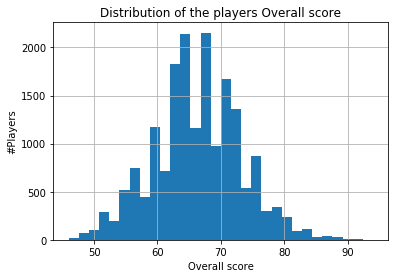

In [4]:
ax = df_players.hist(column= "Overall",bins=30)
plt.title('Distribution of the players Overall score')
plt.xlabel('Overall score')
plt.ylabel('#Players')
plt.show()

### <font color = 'deeppink'> A1.2. </font>
Using a histogram with 30 bins shows a difference from the expected distribution. Some adjacent bins have a considerable difference in value. This is most likely due to the separation of the value range into multiple bins when making the historgram plot. Except this, the overall shape of the distribution curve is similar to a Gaussian's with a mean value around 65.

#### A1.3.
If you observe differences from what you expected in **A1.2.**, they might be due to a misrepresentation by the plot. Carefully study the actual values in the *'Overall'* column and **fix** the histogram accordingly! Redo the plot of step A1.2., and briefly state your observations.

In [5]:
print('Column "Overall" is made out of elements of type ' + str(df_players.Overall.dtype) +'. It ranges from ' + str(df_players.Overall.min()) + ' to ' + str(df_players.Overall.max()))

Column "Overall" is made out of elements of type int64. It ranges from 46 to 94


### <font color = 'deeppink'> A1.3. </font>
By checking the range of values covered by the column "Overall", we see that it goes from 46 to 94. This range is not multiple of 30. For this reason the scores, which are integers, will be unequally repartitionned between each bin. by changing the parameter "range" to (40,100), the 30 bins will contain each one exactly a range of 2 values.

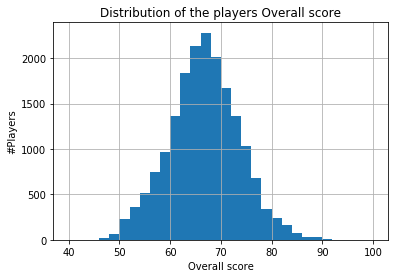

In [6]:
df_players.hist(column= "Overall",bins = 30, range=(40,100))
plt.title('Distribution of the players Overall score')
plt.xlabel('Overall score')
plt.ylabel('#Players')
plt.show()

### A2. Preprocessing

The features that you will use for the remainder of the tasks are the following; you can safely discard the rest of the columns.

In [7]:
skills = ['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [8]:
# Keep only useful columns
df_skills = df_players[skills].copy()

#### A2.1.
Since your final goal will be to train a *linear machine learning model*, all of the features you use need to be *numerical*. 'Work Rate' refers to how much effort a player puts into his play when attacking and defending, respectively, but it is non-numeric and non-atomic. Transform the feature into _two_ numerical features.

In [9]:
df_skills['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [10]:
work_rate_categories = ['Low','Medium','High']
cat_dtype = pd.api.types.CategoricalDtype( categories=work_rate_categories, ordered=True)
df_skills['Work Rate 0'], df_skills['Work Rate 1'] = df_skills['Work Rate'].str.split('/ ').str
df_skills['Work Rate 0'] = df_skills['Work Rate 0'].astype(cat_dtype).cat.codes
df_skills['Work Rate 1'] = df_skills['Work Rate 1'].astype(cat_dtype).cat.codes
df_skills = df_skills.drop('Work Rate', axis=1)

In [11]:
df_skills['Work Rate 0'].unique()

array([1, 2, 0])

### <font color = 'deeppink'> A2.1. </font>
The new columns 'Work Rate 0' & 'Work Rate 1' are numerical features that come from the splitting of 'Work Rate'. The values can be either 0, 1 or 2 which correspond to 'Low', 'Medium' and 'High' respectively. In order to obtain this ranking of the categories, we used ***Pandas***' ***CategoricalDtype*** with the order assigned to each categories as parameter.

#### A2.2.
As it is true for any real-world dataset out there, you might encounter *missing values*. There are numerous ways to *impute* them (fill them up) by looking at records for which these values are not missing.
* Use a *simple aggregation* of the records for which the values are present (not missing) to fill in the missing values.
* Briefly *justify* the choice of your *aggregation scheme*.

### <font color = 'deeppink'> A2.2. </font>
We know that an overall column has no misssing fields. This is an important condition for our method.
For every missing value, we will take the mean value of the field extracted from all the players that have the same team position and same overall scores with a window width of +/- 5.
* Including only the players with same team positions is essential as the expected performance in some fields is not the same for strikers and goalkeepers, for instance.
* Including only players with similar overall scores is more robust when it comes to assigning average values to players in extremities: we would not assign a positioning value of 60 to a striker with an overall score of 95.

In [12]:
# Check which fields have missing values
df_skills.isna().any()

Overall            False
Weak Foot          False
Skill Moves        False
Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed         True
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
GKDiving           False
GKHandling         False
GKKicking          False
GKPositioning      False
GKReflexes         False
Work Rate 0        False
Work Rate 1        False
dtype: bool

In [13]:
# Only SprintSpeed has missing values
df_skills.SprintSpeed.isna().sum()

6

In [14]:
'''
replace_missing takes the players with same position as the player with missing field and within similar
Overall score. Then, it fills the missing value with the mean from the found players.
'''
def replace_missing(lign,column,df):
    if pd.isna(lign[column]):
        overall_score = lign.Overall
        position = lign.Position
        mean = df[(df.Position == position) & (df.Overall <= overall_score +5) & (df.Overall >= overall_score -5)][column].mean()
        return int(mean)
    else:
        return lign[column]
    
# loop over columns with NaN values
for column in df_skills.columns[df_skills.isna().any()]:
    df_skills[column] = df_players.apply(replace_missing,axis=1, args = (column,df_players))

In [15]:
reconstructed_values = df_players[df_players.SprintSpeed.isna()][['Position','Overall']]
reconstructed_values['SprintSpeed'] = df_skills[df_players.SprintSpeed.isna()]['SprintSpeed']
reconstructed_values

,Position,Overall,SprintSpeed
10000,GK,65,39.0
10001,CAM,65,68.0
10002,GK,65,39.0
10003,CM,65,64.0
10004,RM,65,76.0
10005,ST,65,69.0


## A3. Building a regression model

By letting them perform exercises, you have gathered data about the following athletic skills (except for the *overall football performance*) of your candidate players:

In [16]:
athletic_skills = ['Overall', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'Jumping', 'Stamina', 'Strength']

In [17]:
df_athletic = df_skills[athletic_skills].copy()

To decide which player to hire, you need to know how these skills transfer to football performance.

To predict the football performance of a player, you want to build a linear model with an additional regularization term to prevent overfitting. The specific model used in this exercise is L2-regularized linear regression, aka "Ridge Regression". It combines the least squares linear regression model that you know from the lecture with a penalty on the norm of the weight vector [1]. The function that Ridge Regression minimizes is

$$||y-Xw||_2^2 + \alpha ||w||_2^2,$$

where $y$ is a vector of overall ratings, $X$ is the matrix of data vectors with each *row* being the features of a football player, $w$ is the weight vector, and $\alpha$ is the (non-negative) regularization parameter.

[1] If there are enough model parameters, a powerful machine learning model will be able to "memorize" the value it is supposed to predict for some training examples. That means, it will perform well on those training examples, but will perform much worse on data that was not used for training. One way to counter this is to penalize large weight values. This can be thought of as reducing the complexity of the model.

### A3.1.
Split the data randomly into a train (70%) and a test set (30%). Use 1 as the random seed.

In [18]:
test_fraction = 0.3
train_fraction = 1 - test_fraction
df_athletic_train, df_athletic_test = train_test_split(df_athletic, test_size=test_fraction, random_state = 1)
print('df_athletic       has a total number of elements = ' + str(df_athletic.shape[0]))
print('df_athletic_train has a total number of elements = '+ str(df_athletic_train.shape[0]))
print('df_athletic_test  has a total number of elements = '+ str(df_athletic_test.shape[0]))

df_athletic       has a total number of elements = 18159
df_athletic_train has a total number of elements = 12711
df_athletic_test  has a total number of elements = 5448


### A3.2.
Build a Ridge Regression model that predicts a player's overall football performance from the other feature in the list above (sklearn might be helpful here).

Ridge Regression has a regularization parameter $\alpha$. Optimize it in the range [0, 2000] via cross validation. Use as a metric the mean squared error. Plot the cross-validation error as a function of the regularization parameter and choose the best parameter for your final model.

We will use the overall score as y and the rest of the performance scores as x.

### <font color = 'deeppink'> A3.2. </font>
In this part, several ***Sklearn*** features will be used. A new function ***rr_optimize_alpha*** that optimizes alpha in the specified range with a precision of 1e-2. ***Ridge*** is used to create a ridge regression model each time. ***cross_validate*** is used to get the mean squared error each time. By defaults, KFolds is used if the cv parameters is an integer (5 folds here). The minimum alpha will be chosen as the alpha that minimizes the mean square error in two-step procedure. First, all the integers in the desired range are tested, then a more precise region is used to get alpha with a precision of 1e-2.

In [19]:
'''
rr_optimize_alpha finds the best alpha in a range 'range_alpha' with a certain tolerance by minimizing the mean squared error of k-folds.
outputs are:
    * alpha_opt:  float, optimal alpha
    * mse_opt:    float, mse of alpha_opt
    * mse:        1D float array containing the mse for each integer of range_alpha
    * alpha_index index of optimal alpha in the range_alpha
'''
def rr_optimize_alpha(X_train,y_train,range_alpha,k_folds):
    scoring = 'neg_mean_squared_error'
    tol_alpha_opt = 1e-2
    mse = []
    # Loop over integers of optimization range
    for alpha in range_alpha:
        rr = Ridge(alpha = alpha)
        # Use sklearn's cross_validate. KFolds is used when cv parameter is integer
        scores = cross_validate(rr, X_train, y_train, scoring=scoring, cv=k_folds)
        mse.append(-scores['test_score'].mean())
    # Create more precise range to optimize alphas in
    alpha_index  = np.argmin(mse)
    int_alpha_opt = range_alpha[alpha_index]
    range_alpha_precise = np.arange(max(tol_alpha_opt,int_alpha_opt-1),int_alpha_opt +1,tol_alpha_opt)
    # Loop over more precise optimization range
    mse_precise = []
    for alpha in range_alpha_precise:
        rr = Ridge(alpha = alpha)
        # Use sklearn's cross_validate. KFolds is used when cv parameter is integer
        scores = cross_validate(rr, X_train, y_train, scoring=scoring, cv=k_folds)
        mse_precise.append(-scores['test_score'].mean())
    # Find optimal alphas and return variables
    alpha_opt = range_alpha_precise[np.argmin(mse_precise)]
    mse_opt = np.min(mse_precise)
    
    return round(alpha_opt,2), mse_opt, mse, alpha_index

In [20]:
def plot_mse(range_alpha,mse,alpha_opt,mse_opt,alpha_index):
    '''
    plot_mse plots the mean squared error in function of alpha along with the optimal alpha and its mse.
    '''
    
    fig = plt.figure(figsize=(2*6.4, 4.8))
    fig.suptitle('Mean squared error in function of Ridge regression regularization parameter')
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.plot(range_alpha,mse)
    ax1.plot(alpha_opt,mse_opt,'-ro')
    ax1.set_xlabel('Ridge regression alpha')
    ax1.set_ylabel('Mean squared error')
    ax1.legend(['Mean squared error','Optimal alpha'])

    
    ax2.plot(range_alpha[(alpha_index - 10) : (alpha_index + 10)],mse[(alpha_index - 10) : (alpha_index + 10)])
    ax2.plot(alpha_opt,mse_opt,'-ro')
    ax2.set_xlabel('Ridge regression alpha')
    ax2.set_ylabel('Mean squared error')
    ax2.legend(['Mean squared error','Optimal alpha'])

In [21]:
range_alpha = range(1,2000)
k_folds = 5
# Split training dataframe into X & y
y_athletic_train = df_athletic_train['Overall']
X_athletic_train = df_athletic_train.drop('Overall', axis = 1)
alpha_opt, mse_opt, mse, alpha_index = rr_optimize_alpha(X_athletic_train,y_athletic_train,range_alpha,k_folds)
print('Ridge regression with kfolds crossvalidation found an optimum alpha = ' + str(alpha_opt ) \
      + ' and a mean squared error score of ' + str(round(mse_opt,4) ) )

Ridge regression with kfolds crossvalidation found an optimum alpha = 1076.93 and a mean squared error score of 12.2655


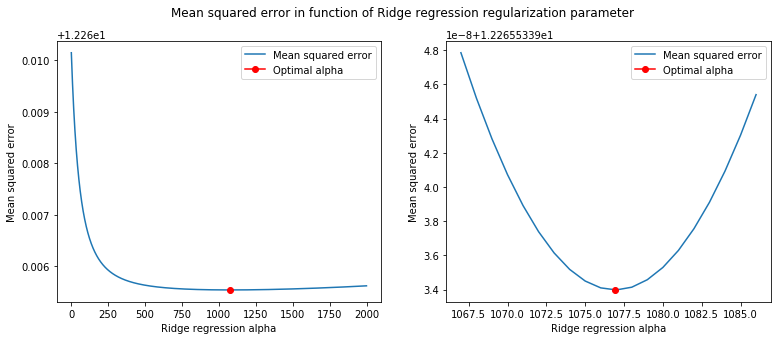

In [22]:
plot_mse(range_alpha,mse,alpha_opt,mse_opt,alpha_index)

## A4. Feature importance

Hiring new players isn't the only job of a manager/head-coach; another important one is training players. While you are at it, you think, why not use the insights gained from the hiring process to also improve the training process of your entire team? Since a training session can only last a limited amount of time and there are several possible exercises to do, you want to know which athletic skill should your training process focus the most upon. Your idea is to use the *weights* of your regression model as a guidance: In your opinion, a *higher weight* for an athletic skill should mean that this skill is highly *predictive* of the football performance.

### A4.1.
* Print the weights. Why might it *not* be a good idea to use them as they are for gauging a skill's importance?
* How can you fix this?
* What has changed due to your fix?

*Hint: Some skills could get disadvantaged (carefully study the ranges of the corresponding features)! This can be prevented by another preprocessing step discussed in the lecture that takes care of differing ranges, after which you need to train the model again.*

In [23]:
rr = Ridge(alpha = alpha_opt)
rr.fit(X_athletic_train,y_athletic_train)
coefs = pd.DataFrame(rr.coef_,index = X_athletic_train.columns, columns = ['weight'])
coefs

,weight
Acceleration,0.003108
SprintSpeed,0.015871
Agility,0.048106
Reactions,0.604731
Balance,-0.032027
Jumping,0.068671
Stamina,-0.007128
Strength,0.072729


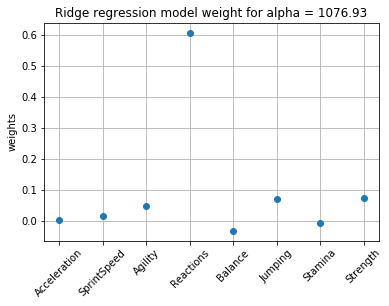

In [24]:
plt.plot(coefs,'o')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('weights')
plt.title('Ridge regression model weight for alpha = ' + str(alpha_opt) )
plt.show()

### <font color = 'deeppink'> A4.1. </font>
We can see that the weighs of feature "Reactions" is predominant than the rest of the features. This is counterintuitive, especially when the subject is the athletic performance of football players: "Acceleration", "SprintSpeed" or "Stamina" have very low weighs comapred to their real-world importance in the field. Also, "balance" and "Stamina" have a negative weight which is not compelling.

Let us check the range of values of each column.

In [25]:
desc = X_athletic_train.describe().loc[['mean','std','min','max']].transpose()
desc

,mean,std,min,max
Acceleration,64.631815,14.937438,12.00,97.00
SprintSpeed,64.724176,14.620247,12.00,96.00
Agility,63.498545,14.755958,14.00,96.00
Reactions,61.859492,9.078645,21.00,96.00
Balance,63.991582,14.021951,16.00,96.00
Jumping,0.651566,0.118041,0.15,0.95
Stamina,63.181339,15.953377,12.00,96.00
Strength,65.300527,12.519052,24.00,97.00


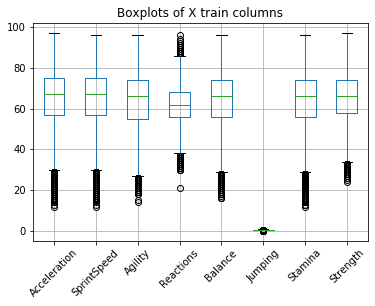

In [26]:
X_athletic_train.plot.box(rot = 45)
plt.title('Boxplots of X train columns')
plt.grid()
plt.show()

### <font color = 'deeppink'> A4.1. </font>
Using the distribution table and the boxplot of each feature of the dataframe, we see a clear distinction between "Reactions" when compared to the rest.
* Except "Reactions" and "Jumping", the features have a mean of around 65 and range from around 15 to 95. Their standard deviation is around 15.
* "Jumping" has a much more reduced range : from 0.95 to 0.15 and an std and mean of 0.12 and 0.65 respectively.
* "Reactions" has a mean value of 62 which is comparable to the rest of the features. However, it has a more condensed range of values when compared to the rest: it has a std of 9.

It seems that the range of values influences the weights of the regression model. For this reason, a rescaling will be performed on the elements of each column in order to have the same range, unit std and a mean value of zero. Fortunately ***Sklearn*** allows this feature by using ***StandardScaler*** before applying alpha optimization.

In [27]:
scaler = StandardScaler().fit(X_athletic_train)
X_athletic_train_scaled = scaler.transform(X_athletic_train)
X_athletic_train_scaled = pd.DataFrame(X_athletic_train_scaled, columns = X_athletic_train.columns)
X_athletic_train_scaled.describe().loc['mean':'std']

,Acceleration,SprintSpeed,Agility,Reactions,Balance,Jumping,Stamina,Strength
mean,2.203676e-16,8.227756e-17,-1.421777e-16,-2.113887e-16,1.966975e-17,-5.658635e-16,-4.068459e-17,4.561426e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00


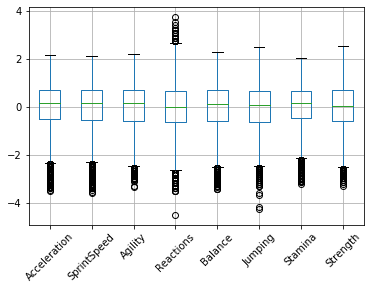

In [28]:
X_athletic_train_scaled.plot.box(rot=45)
plt.grid()

In [29]:
# Optimize with scaled X_train
alpha_opt_4_1, mse_opt, mse, alpha_index = rr_optimize_alpha(X_athletic_train_scaled,y_athletic_train,range_alpha,k_folds)
print('Ridge regression with kfolds crossvalidation found an optimum alpha = ' + str(alpha_opt_4_1 ) \
      + ' and a mean squared error score of ' + str(round(mse_opt,4) ) )

Ridge regression with kfolds crossvalidation found an optimum alpha = 13.67 and a mean squared error score of 12.2702


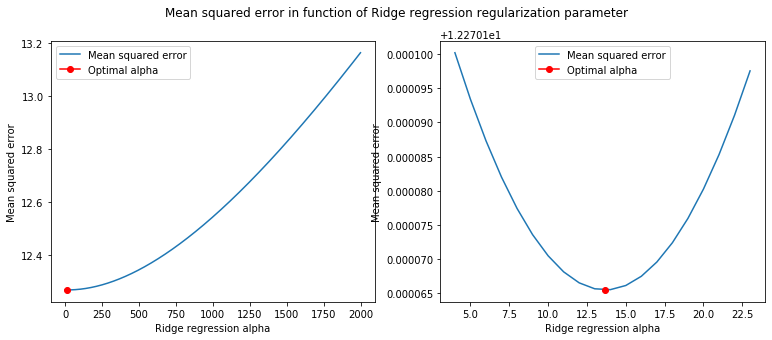

In [30]:
plot_mse(range_alpha,mse,alpha_opt_4_1,mse_opt,alpha_index)

In [31]:
rr = Ridge(alpha = alpha_opt_4_1)
rr.fit(X_athletic_train_scaled,y_athletic_train)
coefs_scaled = pd.DataFrame(rr.coef_,index = X_athletic_train_scaled.columns, columns = ['weight'])
coefs_scaled

,weight
Acceleration,0.049732
SprintSpeed,0.228663
Agility,0.705168
Reactions,5.485565
Balance,-0.462497
Jumping,0.070442
Stamina,-0.119066
Strength,0.888367


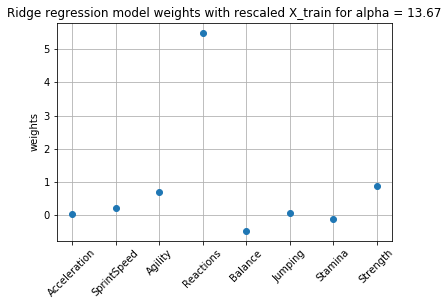

In [32]:
plt.plot(coefs_scaled,'o')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('weights')
plt.title('Ridge regression model weights with rescaled X_train for alpha = ' + str(alpha_opt_4_1) )
plt.show()

### A4.2.
* After the *fix* in step A4.1., is everything fine now with the weights? Sort the weights in descending order. Do you observe anything unexpected with the lowest-ranked weights?
* Do you have an idea what could be the potential cause for this? (No need to analytically prove your hypothesis.)
* Come up with a better way to gauge the importance of a feature for the overall performance.

In [33]:
coefs_scaled.sort_values(by = 'weight', axis=0, ascending=False, inplace=True)
coefs_scaled

,weight
Reactions,5.485565
Strength,0.888367
Agility,0.705168
SprintSpeed,0.228663
Jumping,0.070442
Acceleration,0.049732
Stamina,-0.119066
Balance,-0.462497


### <font color = 'deeppink'> A4.2. </font>
* Compared to the previous results, the "Reactions" feature gained a much higher weight. It went up from around 0.6 to 5.5. The other features stayed in the same weight range (less than 1) and are now less predominant than before as the weight of "Reactions" skyrocketed. Also, "Balance" and "Stamina" the features with the lowest two weight have negative values. In our regression model, it is interpreted that when the values of these fields grow, the "Overall" score drops.
* This distribution in the weights comes most likely from the fact that some features are more important than others depending on the position of the players; a striker will need higher acceleration skills than a goalkeeper to have a higher overall score. For this reason, it seems that "Reactions" is a skill that varies the least with the position of the players. Thus the Ridge model considers it best to predict the "Overall" score.
* To test the importance of a feature on the overall performance, once can perform a Chi-2 test and see which features influence most the result. ***Sklearn***'s ***SelectKBest*** gives an estimation of the best features to represent the data.

In [34]:
# Chi-2 test:
feature_selector = SelectKBest(chi2, k='all')
X_kbest = feature_selector.fit_transform(X_athletic_train, y_athletic_train)
feature_score = pd.DataFrame(feature_selector.scores_ , index = X_athletic_train.columns,columns = ['Chi-2 Score'])
feature_score

,Chi-2 Score
Acceleration,2025.943666
SprintSpeed,2211.367566
Agility,3424.440650
Reactions,12341.242444
Balance,564.799162
Jumping,21.114117
Stamina,7673.402421
Strength,4460.862551


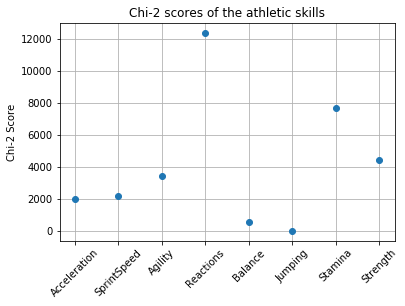

In [35]:
plt.plot(feature_score,'o')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Chi-2 Score')
plt.title('Chi-2 scores of the athletic skills' )
plt.show()

### <font color = 'deeppink'> A4.2. </font>
The Chi-2 scores of each feature showed a repartition different from the ridge regression weights. "Reactions" is still on top of the list. However, "Stamina", "Strength" and "Agility" considerably gained in importance. We can use the ranking of the scores obtained previously to rank the features by their importance in determining the "Overall" score value. The higher the score, the more important the feature is.

## A5. Model Improvements

During the ongoing recruiting process, it turns out that attending all the ADA lectures and tutorials has paid off: Solving the ADA homework went like a charm and you are already done with it. Now you wonder whether it is worth going to some football games of the candidates to assess their football-related skills explicitly, and include these skills in training your ML model.

### A5.1. Improving the model
Train a second model, this time also including as features the football-related skills from the list in the step **A2**. Again use cross validation to compute the best hyperparameter in the range [0,2000].

In [36]:
df_skills_train, df_skills_test = train_test_split(df_skills, test_size=test_fraction, random_state = 1)
print('df_skills       has a total number of elements = ' + str(df_skills.shape[0]))
print('df_skills_train has a total number of elements = ' + str(df_skills_train.shape[0]))
print('df_skills_test  has a total number of elements = ' + str(df_skills_test.shape[0]))

df_skills       has a total number of elements = 18159
df_skills_train has a total number of elements = 12711
df_skills_test  has a total number of elements = 5448


In [37]:
# Split dataframe into training and test X & y
y_skills_train = df_skills_train['Overall']
X_skills_train = df_skills_train.drop('Overall', axis = 1)
# Scale X_train
scaler = StandardScaler().fit(X_skills_train)
X_skills_train_scaled = scaler.transform(X_skills_train)
X_skills_train_scaled = pd.DataFrame(X_skills_train_scaled, columns = X_skills_train.columns)
# Optimize with scaled X_train
alpha_opt_5_1, mse_opt, mse, alpha_index = rr_optimize_alpha(X_skills_train_scaled,y_skills_train,range_alpha,k_folds)
print('Ridge regression with kfolds crossvalidation found an optimum alpha = ' + str(alpha_opt_5_1 ) \
      + ' and a mean squared error score of ' + str(round(mse_opt,4) ) )

Ridge regression with kfolds crossvalidation found an optimum alpha = 16.96 and a mean squared error score of 6.4905


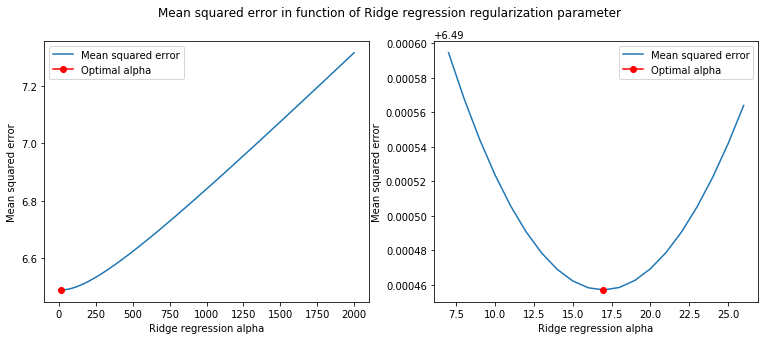

In [38]:
plot_mse(range_alpha,mse,alpha_opt_5_1,mse_opt,alpha_index)

### A5.2. Assessing the improvement
Compute *bootstrap confidence intervals* for the mean squared error that the two models (trained in the steps **A4.1** and **A5.1**) make. Retrain both models *1000 times*, each time with a different random train/test split, and compute the respective mean squared errors.   
*Note: Use the 'optimal regularization parameters' already found via cross validation in steps **A4.1** and **A5.1**.*

* Find the *two-sided 95% confidence intervals* via bootstrap resampling and plot the mean error together with the confidence interval in a bar plot.
* What can you say about the properties of the models based on the confidence intervals?
* Do you have sufficient evidence to claim that one model is clearly better than the other? Clearly explain your observations!

In [39]:
'''
rr_bootstrap_mse performs bootstrapping of a ridge regression model on a dataframe 'df'. It performs resampling of 'df', performs the training
with a ridge regression model of parameter 'rr_alpha' and stores the mean squared error from prediction of the test set (remaining set after
resampling). This operation is performed a number of 'repetitions' times and the output is an array 'mse_scores' of the mse of each repetition.
'''
def rr_bootstrap_mse(df,rr_alpha,repetitions,n_samples,y_column_name):
    mse_scores = []
    for i in range(repetitions):
        # Split df into train & test
        df_train = resample(df,replace=True, n_samples=n_samples)
        df_test = df.loc[df.index.difference(df_train.index)]
        # Split train & test dataframes into X & y.
        y_train = df_train[y_column_name]
        X_train = df_train.drop(y_column_name, axis = 1)
        y_test = df_test[y_column_name]
        X_test = df_test.drop(y_column_name, axis = 1)
        # fit 
        rr = Ridge(alpha = rr_alpha)
        rr.fit(X_train, y_train)
        # evaluate model
        y_pred = rr.predict(X_test)
        mse_score = metrics.mean_squared_error(y_test, y_pred)
        mse_scores.append(mse_score)
    return mse_scores    

In [40]:
repetitions = 1000
n_samples = round(df_skills.shape[0] * train_fraction)
alpha_bs = 0.95
mse_4_1 = rr_bootstrap_mse(df_athletic,alpha_opt_4_1,repetitions,n_samples,'Overall')
mse_5_1 = rr_bootstrap_mse(df_skills,alpha_opt_5_1,repetitions,n_samples,'Overall')

In [41]:
'''
confidence_interval takes an array of 'mse_scores' and returns the mean, lower & upper extremities as well as the lower range and upper range
of a bootstrap confidence interval. The confidence percentage 'alpha_bs' is taken as input.

'''
def confidence_interval(mse_scores,alpha_bs):
    lower = np.percentile(mse_scores, ((1.0-alpha_bs)/2.0) * 100)
    upper = np.percentile(mse_scores, (((1.0+alpha_bs)/2.0)) * 100)
    mean = np.mean(mse_scores)
    lower_range = mean-lower
    upper_range = upper-mean
    return [lower,upper,mean,lower_range,upper_range]

In [42]:
# Bootstrap confidence intervals
confidence_4_1 = confidence_interval(mse_4_1,alpha_bs)
confidence_5_1 = confidence_interval(mse_5_1,alpha_bs)
df_confidence = pd.DataFrame({'4.1' : confidence_4_1,'5.1':confidence_5_1},index = ['lower','upper','mean','lower_range','upper_range']) 
df_confidence

,4.1,5.1
lower,12.057311,6.329657
upper,12.623938,6.628902
mean,12.342031,6.475596
lower_range,0.284720,0.145939
upper_range,0.281907,0.153306


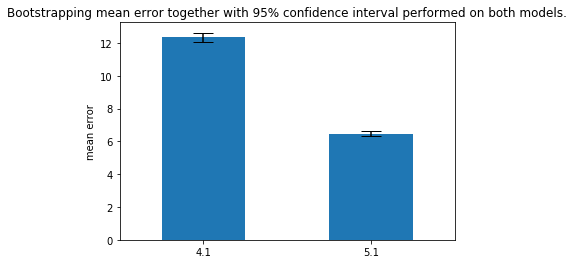

In [43]:
confidence_ranges = df_confidence.loc['lower_range':'upper_range'].to_numpy(dtype=float)
df_confidence.loc['mean'].plot.bar(yerr=confidence_ranges, capsize=10,rot=0)
plt.ylabel('mean error')
plt.title('Bootstrapping mean error together with 95% confidence interval performed on both models.')
plt.show()

### <font color = 'deeppink'> A5.2. </font>
* The 95% Bootstrapping confidence interval for the model in 4.1 is **[12.18, 12.51]** whith a mean squared error of **12.34**. Interval range is **0.33**.
* The 95% Bootstrapping confidence interval for the model in 5.1 is **[6.41, 6.6]** whith a mean squared error of **6.5**. Interval range is **0.19**.

We observe that, by including the other range of skills, the mean error was reduced by a factor of approx. 2. The 95 % Bootstrapping confidence range was also reduced by one third. This means that the model in 5.1 depicts better the 'Overall' score and is more robust than the one relying only on the athletic skills, especially if we consider the relative size of the error compared to the range of values of 'Overall' score: if the error was of an order of magnitude of 1e-9 and it was divided by two, the change would be neglectible but in this case, it is relatively important.

However, the 4.1 model relies only on 8 factors versus 38 for the 5.1 model. In other words, we included an extra 30 factors in order to divide by a factor of 2 the error that resulted only from 8 factors. So if, the goal was to take into account the computational load of each model, the distinction won't be as clear as it is in the case where we only care about precisely predicting the 'Overall' score. 

# Task B: Scaling up

## Description

[Reddit](https://www.reddit.com/) aka *'the front page of the internet'* is a network of over a million *communities* aka *'subreddits'*, each of which covers a different topic based on people's interests. In other words, it is a *massive* collection of forums (corresponding to the aforementioned communities), where people can share content specific to a given topic or comment on other people’s posts.   

You are reddit's community manager and want to *appoint new moderators*. Because moderating a specific subreddit isn't a full-time job, you want the chosen moderators to moderate multiple subreddits at the same time. To make this choice effective, the moderators shouldn't have to spend too much time getting to know the community and the prevalent communication style, so it makes sense to let moderators moderate subreddits that are similar in communication style and language. At the same time, it also makes sense to let them moderate subreddits that are similar with respect to the participating users, because this allows moderators to track the behavior of individual users over multiple subreddits. For example, some users might only post offensive content once a month on a given subreddit, and therefore fly under the radar with someone moderating only that subreddit. However, considering all the subreddits these users post to, they might post something offensive every day but on different subreddits. Thus, a moderator in charge of all these subreddits would be able to ban such users much more effectively. In the light of the above description, your task is to find out ways to choose moderators considering both the textual content and the users of a subreddit.

### Dataset:
The dataset provided to you includes all the posts of the 15 largest subreddits written as of May 2015.

Reddit posts (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/19SVHKbUTUPtC9HMmADJcAAIY1Xjq6WFv/view?usp=sharing))
```
reddit_posts
 |-- id: id of the post 
 |-- author: user name of the author 
 |-- body: text of the message
 |-- subreddit: name of the subreddit
```

Reddit scores (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/1vr4PolJzTXr6ODSe3ucib5EAyp3rjxec/view?usp=sharing))
```
reddit_scores
 |-- id: id of the post 
 |-- score: score computed as sum of UP/DOWN votes
```

*Note: Jaccard similarity between subreddits represented using either the set of top-1000 words or the set of users can be computed locally (on the driver), however, all the other tasks have to be implemented in Spark.*

## B1. Getting a sense of the data

Start a PySpark instance...

In [44]:
import matplotlib.pyplot as plt
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

... and load the data in a Spark dataframe.

In [45]:
reddit_posts = spark.read.json("messages.json.gz")
reddit_scores = spark.read.json("score.json.gz")

### B1.1. Identify the most active subreddit

Print the list of subreddits along with the following information:
1. The total number of posts
2. The number of users with at least 1 message
3. The mean message length

*Note: Keep everything in one single dataframe and print the list sorted by number of posts in descending order.*

In [46]:
print("In total there are {0} reddits".format(reddit_posts.count()))

In total there are 7984080 reddits


**Method**

1. groupby subreddit and count number of post -> `TotalNumberPosts`
2. groupby subreddit and count distinct authors -> `Users`
3. groupby subreddit and compute the mean of length of body -> `MeanMessageLength`
4. finally sort by descending value of `TotalNumberPosts`

In [47]:
subreddits_lists = reddit_posts.groupBy("subreddit")\
                                    .agg(count("*").alias("TotalNumberPosts"),\
                                    countDistinct('author').alias("Users"),\
                                    round(mean(length('body')),2).alias("MeanMessageLength"))\
                                    .sort(desc("TotalNumberPosts"))
subreddits_lists.show()

+---------------+----------------+------+-----------------+
|      subreddit|TotalNumberPosts| Users|MeanMessageLength|
+---------------+----------------+------+-----------------+
|leagueoflegends|         1151287|119321|           152.72|
|            nba|          704862| 45034|           106.49|
|          funny|          691139|224077|           106.82|
|           pics|          564502|205305|           114.97|
|            nfl|          534345| 41593|           148.97|
|         videos|          511492|157628|           170.23|
|           news|          477658| 98736|           230.95|
| DestinyTheGame|          471160| 37008|           165.42|
|         soccer|          455215| 41648|           134.42|
|          DotA2|          445154| 41466|           141.49|
|      worldnews|          439417| 99261|           224.94|
|  AdviceAnimals|          411902|115815|           159.25|
|         hockey|          389329| 25568|            95.37|
|GlobalOffensive|          382017| 46686

### B1.2. Identify the largest subreddit

Print *two* different lists of subreddits: ordered by (1) the number of posts, and (2) the number of users. For each subreddit, print the name and the corresponding counts.

Additionally, (3) plot the mean of message length for each subreddit in descending order. Visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well.

1. `subreddits_posts` list of subreddits ordered by TotalNumberPosts
2. `subreddits_users` list of subreddits ordered by Users
3. `subreddits_mean_length` list of subreddits ordered by MeanMessageLength

In [48]:
subreddits_posts = subreddits_lists.select("subreddit", "TotalNumberPosts")
subreddits_users = subreddits_lists.select("subreddit", "Users").sort(desc("Users"))
subreddits_mean_length = subreddits_lists.select("subreddit", "MeanMessageLength").sort(desc("MeanMessageLength"))

Print list of subreddits orderd by number of posts

In [49]:
subreddits_posts.show()

+---------------+----------------+
|      subreddit|TotalNumberPosts|
+---------------+----------------+
|leagueoflegends|         1151287|
|            nba|          704862|
|          funny|          691139|
|           pics|          564502|
|            nfl|          534345|
|         videos|          511492|
|           news|          477658|
| DestinyTheGame|          471160|
|         soccer|          455215|
|          DotA2|          445154|
|      worldnews|          439417|
|  AdviceAnimals|          411902|
|         hockey|          389329|
|GlobalOffensive|          382017|
|         movies|          354601|
+---------------+----------------+



Print list of subreddits orderd by number of users

In [50]:
subreddits_users.show()

+---------------+------+
|      subreddit| Users|
+---------------+------+
|          funny|224077|
|           pics|205305|
|         videos|157628|
|leagueoflegends|119321|
|  AdviceAnimals|115815|
|      worldnews| 99261|
|           news| 98736|
|         movies| 92484|
|GlobalOffensive| 46686|
|            nba| 45034|
|         soccer| 41648|
|            nfl| 41593|
|          DotA2| 41466|
| DestinyTheGame| 37008|
|         hockey| 25568|
+---------------+------+



We move the dataframe to `Pandas` for further a deeper insight

In [51]:
subreddits_mean_length_pd = subreddits_mean_length.toPandas()
subreddits_mean_length_pd.head()

,subreddit,MeanMessageLength
0,news,230.95
1,worldnews,224.94
2,videos,170.23
3,DestinyTheGame,165.42
4,movies,164.83


In [52]:
'''
confidence_interval takes an array of 'mse_scores' and returns the mean, lower & upper extremities as well as the lower range and upper range
of a confidence interval. The confidence percentage 'alpha_bs' is taken as input.

'''
def confidence_interval_2(mse_scores,alpha_bs):
    mse_scores = np.asarray(mse_scores)
    lower = np.percentile(mse_scores, ((1.0-alpha_bs)/2.0) * 100)
    upper = np.percentile(mse_scores, (((1.0+alpha_bs)/2.0)) * 100)
    mean = np.mean(mse_scores)
    lower_range = mean-lower
    upper_range = upper-mean
    return [mean,lower_range,upper_range]

In [53]:
test = reddit_posts.select("subreddit","body").withColumn("MessageLength", length("body"))\
                                              .groupby("subreddit")\
                                              .agg(collect_list("MessageLength").alias("MessageLengthList"))\
                                              .select("subreddit","MessageLengthList")
test.show()

+---------------+--------------------+
|      subreddit|   MessageLengthList|
+---------------+--------------------+
|         hockey|[72, 35, 35, 128,...|
|         videos|[1925, 359, 191, ...|
|          DotA2|[29, 39, 147, 21,...|
|           news|[82, 220, 111, 11...|
|  AdviceAnimals|[1036, 20, 22, 45...|
| DestinyTheGame|[94, 31, 10, 53, ...|
|           pics|[33, 130, 71, 54,...|
|      worldnews|[569, 15, 25, 140...|
|            nfl|[134, 31, 36, 38,...|
|         soccer|[225, 36, 16, 147...|
|GlobalOffensive|[212, 69, 19, 39,...|
|leagueoflegends|[446, 451, 200, 2...|
|         movies|[146, 75, 37, 218...|
|            nba|[54, 96, 90, 48, ...|
|          funny|[27, 30, 75, 70, ...|
+---------------+--------------------+



In [54]:
test_pd = test.toPandas()
test_pd.head()

,subreddit,MessageLengthList
0,hockey,"[72, 35, 35, 128, 223, 34, 71, 41, 28, 150, 1,..."
1,videos,"[1925, 359, 191, 75, 116, 65, 92, 67, 105, 128..."
2,DotA2,"[29, 39, 147, 21, 86, 15, 119, 44, 66, 425, 93..."
3,news,"[82, 220, 111, 116, 170, 1305, 905, 787, 60, 4..."
4,AdviceAnimals,"[1036, 20, 22, 456, 236, 71, 41, 40, 72, 44, 4..."


In [55]:
#test_pd['lower'],test_pd['upper'],test_pd['mean'],test_pd['lower_range'],test_pd['upper_range'] = test_pd.MessageLengthList.apply(lambda x: confidence_interval(x,0.99))
#test_pd[['lower'],['upper'],['mean'],['lower_range'],['upper_range']] = test_pd.MessageLengthList.apply(lambda x: confidence_interval(x,0.99))
test_pd['distribution'] = test_pd.MessageLengthList.apply(lambda x: confidence_interval_2(x,0.99))
test_pd[['mean', 'lower_range', 'upper_range']] = pd.DataFrame(test_pd.distribution.values.tolist(), index=test_pd.index)
test_pd = test_pd[['mean', 'lower_range', 'upper_range']]
test_pd = test_pd.sort_values(by='mean', ascending=False)
test_pd

,mean,lower_range,upper_range
3,230.949160,219.949160,1807.050840
7,224.937547,220.937547,1891.062453
1,170.227026,167.227026,1466.317974
5,165.417869,161.417869,1197.787131
12,164.832093,160.832093,1359.167907
4,159.251380,156.251380,1246.748620
11,152.722808,149.722808,1303.277192
8,148.969892,145.969892,1246.030108
10,147.288398,144.288398,1124.711602
2,141.489067,138.489067,1465.510933


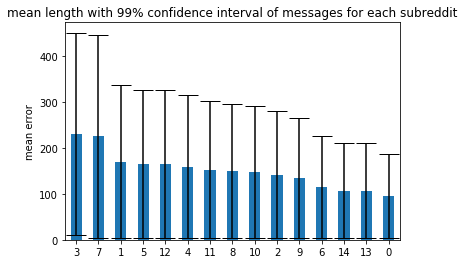

In [56]:
confidence_ranges = np.transpose(test_pd[['lower_range','upper_range']].to_numpy(dtype=float))
test_pd['mean'].plot.bar(yerr=confidence_ranges, capsize=10,rot=0)
#test_pd['mean'].plot.bar(yerr=test_pd[['lower_range','upper_range']], capsize=10,rot=0)
plt.ylabel('mean error')
plt.title('mean length with 99% confidence interval of messages for each subreddit')
plt.show()

Text(0.5, 1.0, 'Mean message length by subreddit')

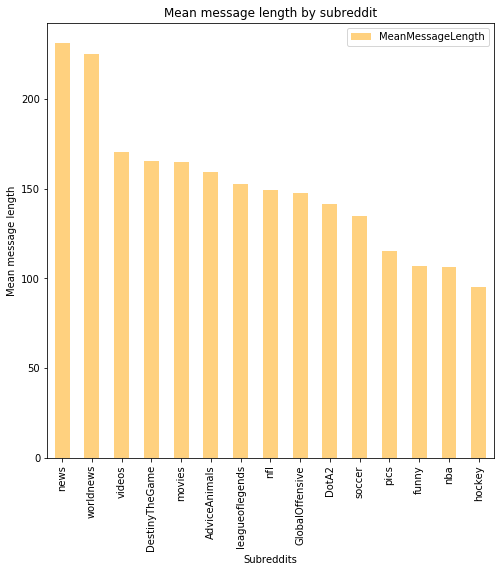

In [57]:
pl = subreddits_mean_length_pd.plot(kind="bar", 
                                    x="subreddit", y="MeanMessageLength",
                                    figsize=(8, 8), log=False, alpha=0.5, color="orange")

pl.set_xlabel("Subreddits")
pl.set_ylabel("Mean message length")
pl.set_title("Mean message length by subreddit")

### B1.3. Identify the subreddit with the highest average score

Print the list of subreddits sorted by their average content scores.

In [58]:
#merge reddit_posts and reddit_scores on column id of both dataframes and keep only column subreddit and score
reddits_joined = reddit_posts.join(reddit_scores, reddit_posts.id == reddit_scores.id)\
                             .select("subreddit", "score")

Print of the list of subreddits sorted by their average score 

In [59]:
#we can finally groupby the subreddits and sort them based on their average scores
subreddits_score = reddits_joined.groupBy("subreddit")\
                                 .agg(round(avg('score'),2).alias("AverageScore"))\
                                 .sort(desc("AverageScore"))
subreddits_score.show()

+---------------+------------+
|      subreddit|AverageScore|
+---------------+------------+
|         videos|       12.65|
|           pics|       12.22|
|          funny|       12.04|
|  AdviceAnimals|       11.25|
|         soccer|       10.63|
|         movies|        9.82|
|            nfl|        9.05|
|            nba|        9.03|
|           news|        8.67|
|      worldnews|        7.87|
|         hockey|        6.52|
|leagueoflegends|        5.98|
|          DotA2|        4.88|
|GlobalOffensive|        4.35|
| DestinyTheGame|        3.03|
+---------------+------------+



## B2. Moderator assignment based on Subreddit Textual Content

Different subreddits follow different communication styles inherent in the topic and the community. Having said that, the goal is to discover similar subreddits by only looking at the *words* present in the posted messages. Once such a list of similar subreddits is identified, an appropriately chosen moderator can then be assigned to all these subreddits.

Specifically, the task boils down to computing a similarity score between two subreddits based on the *words* present in their textual content. Your first idea is to use the *Jaccard similarity*, which is defined as the size of the intersection of two sets divided by the size of their union.

$Jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}$

In [60]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

## Functions
Here we present three functions that we defined for the next tasks 


**jaccard_matrix:**
Function that takes an array of subreddits and their respective lists of words/authors and returns matrix of similarity scores between different subreddits using jaccard_similarity

In [100]:
def jaccard_matrix(array):
    n = array[:,0].size
    jaccard = np.zeros((15,15))
    for i in range(15):
         for j in range(15):
                jaccard[i,j] = jaccard_similarity(array[i,1],array[j,1])
       
    return jaccard   

**similarity_matrix:** Function that takes a spark dataframe transform it to a numpy array (15,2) that has aubreddits with their coresponding list/set of users/words and return the similarity matrix between the different subreddits based on the jaccard similarity function 

In [62]:
def similarity_matrix(spark_dataframe):
    array = np.array(spark_dataframe.toPandas())
    similarity_matrix = jaccard_matrix(array)
    return similarity_matrix , array

**spark_heatmap:** Function that takes a similarity matrix and and the numpy array of a spark dataframe and plots the corresponding heat map with the right title

In [63]:
import seaborn as sns
import numpy as np

In [64]:
def spark_heatmap(similarity_matrix , array, title):
    ticks = array[:,0] #names of subreddits taken from first column of the array
    plt.subplots(figsize=(15,10))
    heatmap = sns.heatmap(similarity_matrix , annot=True, linewidth=0.25 , cmap="YlGnBu")
    heatmap.set_xticklabels(ticks, rotation=90, horizontalalignment='right')
    heatmap.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
    heatmap.set_xlabel('subreddit')
    heatmap.set_ylabel('subreddit')
    heatmap.set_title(title)
    plt.show()   

### B2.1.
The first step requires constructing a set representation of each subreddit. The goal is to represent each subreddit as a *set of words* existing in the messages posted on that subreddit. Compute the 50,000 most frequent words across all the provided subreddits. Construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

Some rules:
 * Words are defined as tokens matching the regular expression `\W`
 * Remove all the stop-words (English language)

*Note: You might find the [RegexTokenizer](https://spark.apache.org/docs/2.2.0/ml-features.html#tokenizer) and the [StopWordsRemover](https://spark.apache.org/docs/2.2.0/ml-features.html#stopwordsremover) utilities available in the package pyspark.ml useful for this task as they help you in transforming the features and removing stopwords.*

In [65]:
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from pyspark.ml.feature import StopWordsRemover

In [66]:
subreddit_words = reddit_posts.select("id", "subreddit", "body")

regexTokenizer = RegexTokenizer(inputCol="body", outputCol="words", pattern="\W")
subreddit_words = regexTokenizer.transform(subreddit_words)#column "words" contains tokenized words

remover = StopWordsRemover(inputCol="words", outputCol="words_filtered")
subreddit_words = remover.transform(subreddit_words)#column "words_filtered" contains tokenized words without stop words

subreddit_words.show(10)

+-------+---------------+--------------------+--------------------+--------------------+
|     id|      subreddit|                body|               words|      words_filtered|
+-------+---------------+--------------------+--------------------+--------------------+
|cqug90h|            nba|gg this one's ove...|[gg, this, one, s...|[gg, one, watch, ...|
|cqug90p|GlobalOffensive|Nihilum and LG ar...|[nihilum, and, lg...|[nihilum, lg, sig...|
|cqug916|           pics|Me too. Same hamm...|[me, too, same, h...|   [hammock, fabric]|
|cqug919|leagueoflegends|well i think new ...|[well, i, think, ...|[well, think, new...|
|cqug91n|  AdviceAnimals|That's something ...|[that, s, somethi...|[something, hear,...|
|cqug91p|         videos|Because we aren't...|[because, we, are...|[aren, responsibl...|
|cqug91z|            nba|Well yeah. The fi...|[well, yeah, the,...|[well, yeah, firs...|
|cqug92a|            nba|**[STREAMLINK](ht...|[streamlink, http...|[streamlink, http...|
|cqug92b|           n

Select only "subreddit" and "words_filtered" columns

In [67]:
subreddit_words = subreddit_words.select("subreddit", "words_filtered")
subreddit_words.show(10)

+---------------+--------------------+
|      subreddit|      words_filtered|
+---------------+--------------------+
|            nba|[gg, one, watch, ...|
|GlobalOffensive|[nihilum, lg, sig...|
|           pics|   [hammock, fabric]|
|leagueoflegends|[well, think, new...|
|  AdviceAnimals|[something, hear,...|
|         videos|[aren, responsibl...|
|            nba|[well, yeah, firs...|
|            nba|[streamlink, http...|
|           news|[1, got, bigwig, ...|
|         movies|[holy, shit, coul...|
+---------------+--------------------+
only showing top 10 rows



`word_count` is a dataframe that contains words with their number of occurence .

In [68]:
word_count = subreddit_words.withColumn("words", explode(subreddit_words.words_filtered)).groupBy("words")\
                                                                          .agg(count("*").alias("WordOccurence"))\
                                                                          .sort(desc("WordOccurence"))
word_count.show(10)

+------+-------------+
| words|WordOccurence|
+------+-------------+
|  like|      1018978|
|people|       745031|
|   get|       691349|
|   one|       682820|
| think|       575352|
|     m|       569057|
|    re|       517827|
|   com|       497303|
|  time|       456060|
|  good|       454768|
+------+-------------+
only showing top 10 rows



Retain the first 50000 most used words 

In [69]:
frequent_words = word_count.limit(50000)

In [70]:
frequent_words.show(10)

+------+-------------+
| words|WordOccurence|
+------+-------------+
|  like|      1018978|
|people|       745031|
|   get|       691349|
|   one|       682820|
| think|       575352|
|     m|       569057|
|    re|       517827|
|   com|       497303|
|  time|       456060|
|  good|       454768|
+------+-------------+
only showing top 10 rows



`all_words_subreddits` is a dataframe that merges all subreddits with all the retained words ( the 50.000 most used words)

In [71]:
all_words_subreddits = frequent_words.select("words").crossJoin(subreddit_words.select("subreddit").distinct())
all_words_subreddits.show(10)

+------+---------+
| words|subreddit|
+------+---------+
|  like|   hockey|
|people|   hockey|
|   get|   hockey|
|   one|   hockey|
| think|   hockey|
|     m|   hockey|
|    re|   hockey|
|   com|   hockey|
|  time|   hockey|
|  good|   hockey|
+------+---------+
only showing top 10 rows



`top50000_words_subreddits:`for each subreddit keep only words that are in the top 50.000 used words .

In [72]:
top50000_words_subreddits = subreddit_words.withColumn("words", explode(subreddit_words.words_filtered))\
                                          .select("subreddit", "words")\
                                          .join(all_words_subreddits, ["subreddit", "words"], "inner")\
                                          .groupby("subreddit")\
                                          .agg(collect_set("words").alias("wordList"))
top50000_words_subreddits.show(10)

+--------------+--------------------+
|     subreddit|            wordList|
+--------------+--------------------+
|        hockey|[swamps, thorne, ...|
|        videos|[swamps, thorne, ...|
|         DotA2|[swamps, thorne, ...|
|          news|[swamps, deterior...|
| AdviceAnimals|[swamps, thorne, ...|
|DestinyTheGame|[swamps, thorne, ...|
|          pics|[swamps, thorne, ...|
|     worldnews|[swamps, thorne, ...|
|           nfl|[swamps, deterior...|
|        soccer|[swamps, thorne, ...|
+--------------+--------------------+
only showing top 10 rows



### B2.2.
* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B2.1.**, and plot in a heatmap the similarity values of all the pairs of subreddits.
* Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
* Provide detailed interpretations of the obtained results. Specifically,
    - Explain the limitations of your conclusions, and discuss the potential reasons.
    - Explain the potential problems with the Jaccard similarity function.

In [73]:
similarity_matrix_50000, top50000_words_subreddits_np = similarity_matrix(top50000_words_subreddits)

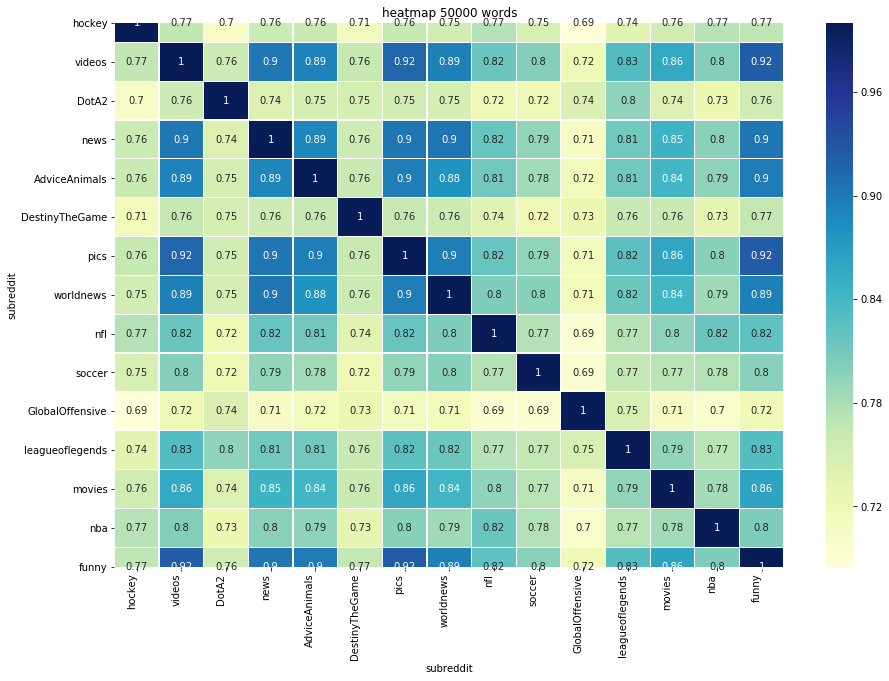

In [74]:
spark_heatmap(similarity_matrix_50000, top50000_words_subreddits_np,'heatmap 50000 words')

#### Plot analysis and observations
We observe that topic-related subreddits share a very high similarity value for different fields e.g <br> 
*Gaming* : (League of Legends , DotA2)= 0.8 <br> 
*News* : (news , worldnews) = 0.9 <br> 
*Sports* : (NBA , NFL) = 0.82 ; (NBA , hockey ) = 0.77 <br> 
*Memes* : (funny , pics) = 0.92 ; (funny , videos) = 0.92

#### Limitations and potential reasons 
However this heatmap also shows it's not necesary for subreddits to be related to share a high similarity value . <br> 
In fact, a lot of examples prove the opposite where two totally different topics seem to be similar accordong to the jaccard function like :<br> **(news , league of legend) = 0.81** which is even higher than the **(DotA2 , League Of Legends)= 0.8**  <br> 
**(news, advice animal ) = 0.89** . **Clearly this is a problem !** <br>
The reason behind these *overrated* values is our method for constructing the representation set for each subreddit . <br>
In fact , retaining only the words that are common among all subreddits removes any specificity among the different subreddits which explains the fact that the least similarity value between all kind of subreddits (no matter how different they are)  is **0.69** ! 


#### Potential problems with the Jaccard similarity function
One of the problems of the jaccard similarity function is that it transforms the list of words to a set of the words thus removes any *redundance sensibility* between subreddits making our results not robust to the occurence of the words in each subreddit 

### B2.3.

* Alternatively, compute the 1000 most frequent words for each subreddit, construct its representation as the set of top-1000 words, and print a heatmap with the Jaccard similarity like in step **B2.2.**.
* Explain your observations in detail: how and why is this new result different from the one obtained in **B2.2.**?

*Note: Use the same rules specified in B2.1: words tokenized with the regex \W and stop-words removed*

`flattened_subreddits:` dataframe containing the occrurence of each word in each subreddit from `subreddit_words` dataframe
that contains the tokenized words for each message 

In [75]:
flattened_subreddits = subreddit_words.withColumn("word", explode(subreddit_words.words_filtered))\
                                      .select("subreddit", "word")\
                                      .groupBy("subreddit","word")\
                                      .agg(count("*").alias("WordOccurence"))                                                                                                     
flattened_subreddits.show(10)

+---------------+---------+-------------+
|      subreddit|     word|WordOccurence|
+---------------+---------+-------------+
|         videos|forebears|            2|
|         videos|    riots|          442|
|         videos|     sure|        13973|
|           news| sleeping|          375|
|          DotA2|   modify|           45|
|leagueoflegends|     gold|        17398|
|         movies|   coming|         2939|
|leagueoflegends|     case|         9027|
|leagueoflegends|    offer|         1676|
|  AdviceAnimals|      big|         5553|
+---------------+---------+-------------+
only showing top 10 rows



partitioning the `flattened_subreddits` by *subreddit* and oredering by *WordOccurence* ( Use of window )

then taking only the first 1000 words for each subreddit 

In [76]:
from pyspark.sql import Window

In [77]:
window = Window.partitionBy("subreddit").orderBy(col("WordOccurence").desc())

In [78]:
top_words_subreddit = flattened_subreddits.withColumn("rank", row_number().over(window)).filter(col("rank")<=1000)
top_words_subreddit.show(10)

+---------+-----+-------------+----+
|subreddit| word|WordOccurence|rank|
+---------+-----+-------------+----+
|   hockey| like|        33899|   1|
|   hockey| game|        32360|   2|
|   hockey|  com|        24312|   3|
|   hockey| team|        24072|   4|
|   hockey|  one|        22892|   5|
|   hockey|    m|        22091|   6|
|   hockey|  get|        20629|   7|
|   hockey| good|        20033|   8|
|   hockey|think|        19830|   9|
|   hockey| http|        16968|  10|
+---------+-----+-------------+----+
only showing top 10 rows



`top_words_subreddit_1000:` dataframe containing the list of 1000 most used words for each subreddit  

In [79]:
top_words_subreddit_1000 = top_words_subreddit.select("subreddit","word")\
                                              .groupby("subreddit")\
                                              .agg(collect_set("word").alias("wordList"))
top_words_subreddit_1000.show(10)

+--------------+--------------------+
|     subreddit|            wordList|
+--------------+--------------------+
|        hockey|[zone, put, u, cb...|
|        videos|[girl, u, put, be...|
|         DotA2|[casting, china, ...|
|          news|[china, girl, put...|
| AdviceAnimals|[girl, put, u, be...|
|DestinyTheGame|[zone, put, u, gh...|
|          pics|[girl, put, u, be...|
|     worldnews|[china, u, put, k...|
|           nfl|[zone, put, u, ch...|
|        soccer|[yellow, put, u, ...|
+--------------+--------------------+
only showing top 10 rows



In [80]:
similarity_matrix_1000, top1000_words_subreddits_np = similarity_matrix(top_words_subreddit_1000)

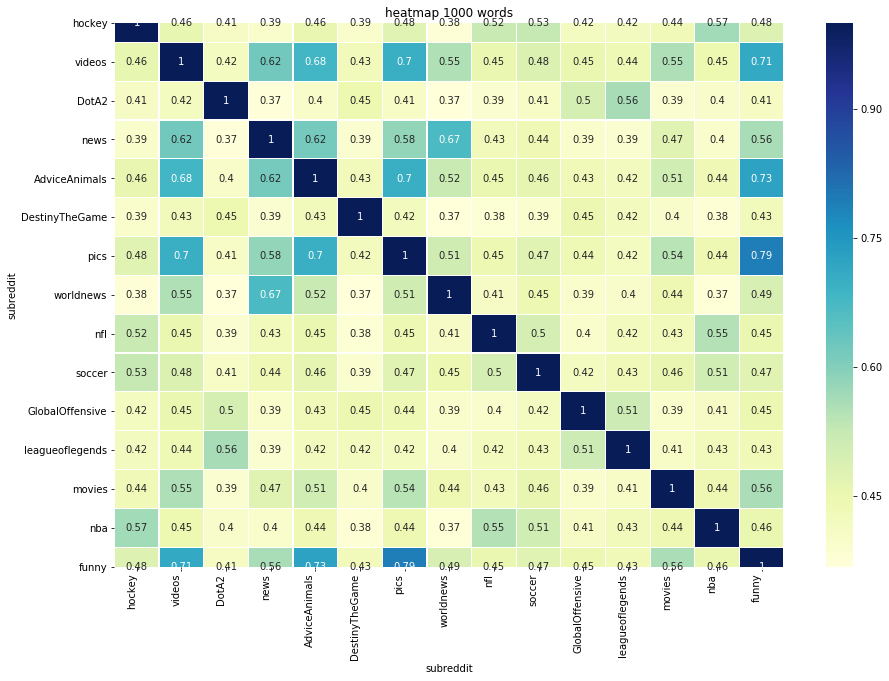

In [81]:
spark_heatmap(similarity_matrix_1000, top1000_words_subreddits_np,'heatmap 1000 words')

#### Plot analysis and observations
In this case we still can observe that topic-related subreddits share a high similarity value for different fields e.g <br> 
*Gaming* : (League of Legends , DotA2)= 0.56 ( highest value for both of these subreddits with any other subreddit) <br> 
*News* : (news , worldnews) = 0.67 ( highest value for both of these subreddits with any other subreddit)  <br> 
*Sports* : (NBA , NFL) = 0.55 ; (NBA , hockey ) = 0.57 <br> 
*Memes* : (funny , pics) = 0.79 **highest value of similarity matrix** ; (funny , videos) = 0.71 

#### Difference from B2.2 heatmap

`Topic-related subreddits`: Although some topics are very related like (DotA2 , LOL) for being MOBA video games  their similarity value decreased relatively to the one in B2.2 . In fact, these games don't have the same champions names nor the same spells names thus making the 1000 most used words for each subreddit different to a certain point . However they still share the same "action words " like "pushing" , "minions" , "kill" etc ,..  <br> <br>
This same reason explains the drop in the similarity value between NBA and NFL . Despite both of these subreddits are sports but football and basketball don't share the same players nor the same rules nor the same stadiums etc ... 

In [82]:
LOL_DotA2_common_words = np.intersect1d(top1000_words_subreddits_np[2,1],top1000_words_subreddits_np[11,1])

In [83]:
NFL_NBA_common_words = np.intersect1d(top1000_words_subreddits_np[8,1],top1000_words_subreddits_np[13,1])

`Non-topic-related subreddits`: However in opposition to B2.2 , non-topic-related subreddits don't share a high similarity value anymore e.g (news , league of legend) went down from 0.81 to 0.39 which is a good thing <br> 
This shows that taking 1000 most used words for each subreddit is more robust to topic specificity and this is the case for almost all the non-topic related subreddits except (news , AdviceAnimals) which still has a relatively high value 

## B3. Moderator assignment based on Subreddit Users

Subreddits can be seen as communities of people interacting about a common topic. As an alternative to the *textual content* based similarity in **B2**, your task here is to validate if similarity between two subreddits can be measured based on their participating users.

Of course users are not monothematic, and they interact with multiple subreddits. In this task, we are specifically interested in observing the amount of overlap across different subreddits based on their participating users. Similar to **B2**, the overlap is measured using the *Jaccard similarity*.


### B3.1.
Construct a set representation of each subreddit as the users that posted at least one time in that subreddit.

Some users are very talkative and active across different topics. Print the username of the person that posted in the maximum number of subreddits. *Note that users who posted at least once in a subreddit are considered as participant of that subreddit.*

Print of the set representation of each subreddit as the users that posted at least one time in that subreddit in a list of users 

In [84]:
users_subreddit = reddit_posts.select("subreddit", "author").groupBy("subreddit")\
                                                            .agg(collect_set("author").alias("UsersList"))
users_subreddit.show(10)

+--------------+--------------------+
|     subreddit|           UsersList|
+--------------+--------------------+
|        hockey|[halpinator, Musi...|
|        videos|[Th_Ghost_of_Bob_...|
|         DotA2|[robikasztar, Box...|
|          news|[Almostcomatose, ...|
| AdviceAnimals|[Mittelstrahl, co...|
|DestinyTheGame|[thefrabbot, rxni...|
|          pics|[LadyCoru, first_...|
|     worldnews|[Almostcomatose, ...|
|           nfl|[ThatImpalerGuy, ...|
|        soccer|[UkuleleSean, ale...|
+--------------+--------------------+
only showing top 10 rows



Print of the username of the person that posted in the maximum number of subreddits

In [85]:
talkative_users = reddit_posts.groupBy("author")\
                            .agg(countDistinct("subreddit").alias("NumberOfSubreddits"))\
                            .sort(desc("NumberOfSubreddits"))
talkative_users.show()

+--------------------+------------------+
|              author|NumberOfSubreddits|
+--------------------+------------------+
|             whispen|                15|
|             PaidBot|                14|
|       AutoModerator|                13|
|Really_Like_Pancakes|                13|
|        Fortehlulz33|                12|
|LeAtheist_Swagmaster|                12|
|           vannucker|                12|
|         ConcedeDota|                12|
|   you_get_CMV_delta|                12|
|     naturelover7777|                12|
|            Galactic|                12|
|     TheSublimeLight|                12|
|            voxpupil|                12|
|       IamGrimReefer|                12|
|   PitchforkEmporium|                12|
|              Tashre|                12|
|          eaglessoar|                12|
|        poopsmith666|                12|
|      BigLebowskiBot|                12|
|        TreeFiddyBot|                12|
+--------------------+------------

At first sight one can think that the user "whispen" is the most talkative user on reddit but it leaves some doubts due to the fact of participating to **all** different topics no matter how unrelated these topics seem to be . Let's have a deeper insight.

In [86]:
talkative_users.describe("NumberOfSubreddits").show()

+-------+------------------+
|summary|NumberOfSubreddits|
+-------+------------------+
|  count|            828424|
|   mean|1.6798523461415893|
| stddev|1.2134701944659774|
|    min|                 1|
|    max|                15|
+-------+------------------+



The doubts are confirmed . The mean of different subreddits users participated in is 1.68 and "whispen" is far away from this mean . In fact most of the users on top of this ladder contain the word "bot" e.g "PaidBot" ,"TreeFiddyBot" .. which explains their position in this case .  

By invastigating the user "whispen" on reddit it appears that this user got banned . This is the same case for "PaidBot" and "Really_Like_Pancakes" (second and third users ) .

By investigating the comments of the fourth user "AutoModerator", he appears to be is a moderator-bot since all his comments are of this type "HEY MARK - if this is a screencap, or a link to another sub, you'll be banned, permanently. If it's not funny, we'll remove it. This sub doesn't exist for you to bitch about next door. Read the rules, grab a clue, then send me $11.99.of."

By investigating the comments of the fifth user "Fortehlulz33" , he appears to use emojis , abreviations etc,.. so he is a normal user for us . Hence **Fortehlulz33 is the most talkative non-bot user**

### B3.2.

* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B3.1.**, and visualise it similar to **B2**.
* Analyze this plot, identify highly similar pairs of subreddits, and clearly describe your observations.

In [101]:
similarity_matrix_users, users_subreddits_np = similarity_matrix(users_subreddit)

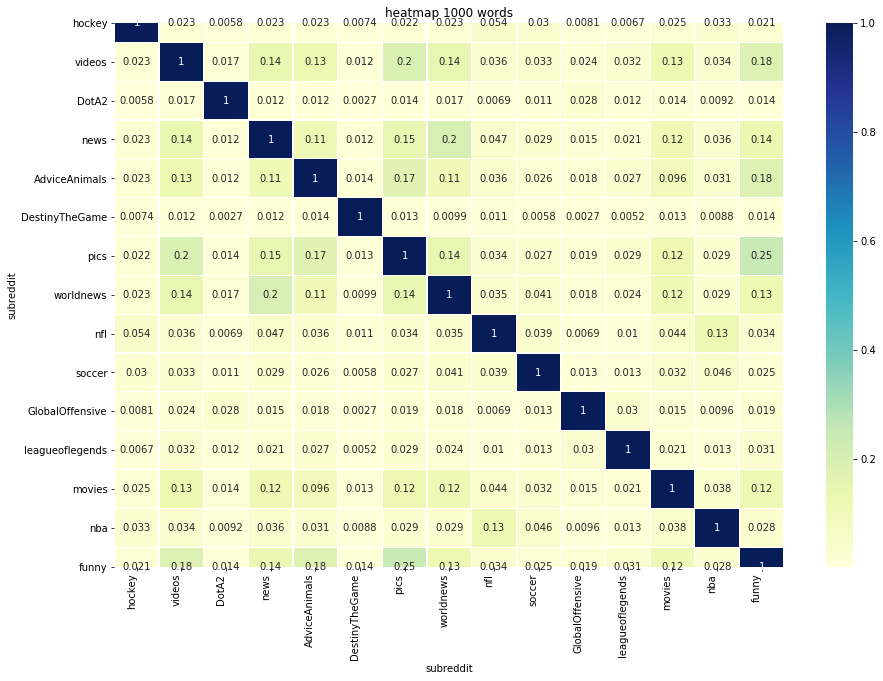

In [102]:
spark_heatmap(similarity_matrix_users, users_subreddits_np,'heatmap 1000 words')

#### Plot analysis
According to this heatmap , similarity values based on the users are very low which is in coheration with the average number of different subreddits each user participates in ( 1.67 ) . So it's less likely to have users commenting on different subreddits. Maybe the only pairs that stand out are (funny, pics) , (funny, videos) and (news, worldnews) <br>
In fact, (funny, pics) and (funny, videos) correspond to the world of **memes**  .This is why these two pairs stood out on the 3 heatmaps .<br>
The pair (news, worldnews) also has a high user similarity value which is reasonable especially in this era where any news from anywhere in the world can go viral across the whole globe thus making users interested in news comment on both of these topic simultaneously .

## B4. Language vs. Users similarity
    
* Visualize the similarity scores based on word (**B2.3.**) and user (**B3**) similarity on the x and y axes respectively for the subreddit `NBA` compared to all the other subreddits. Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
* Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!

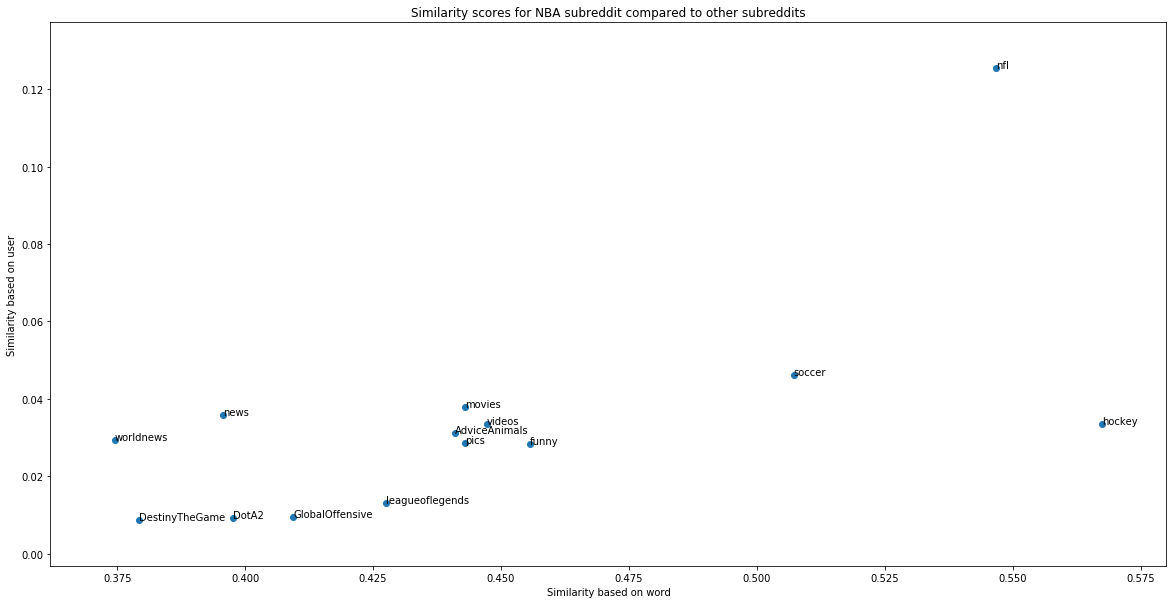

In [89]:
fig, ax = plt.subplots(figsize=(20,10))

ticks = users_subreddits_np[:,0]

#we remove the nba values from the plot
similarity_x = np.delete(similarity_matrix_1000,13,1)
similarity_y = np.delete(similarity_matrix_users,13,1)
scatter_ticks = np.delete(ticks,13,0)

ax.scatter(similarity_x[13,:], similarity_y[13,:])
for i, txt in enumerate(scatter_ticks):
    ax.annotate(txt, (similarity_x[13,i], similarity_y[13,i]))
ax.set_xlabel('Similarity based on word')
ax.set_ylabel('Similarity based on user')
ax.set_title('Similarity scores for NBA subreddit compared to other subreddits')
plt.show()

#### Meaningful groups that emerge  
`Sport group`  : formed by NFL , NBA , hockey , soccer <br> 
This group clearly stand out in this plot as the group that is most related to NBA either in terms of words used to express different opinions on different sport events either in terms of reddit "athletic"-users who tend to have interest toward all american sport with the NFL being most among them to be related to NBA <br>
`E-Sport group`: formed by league of legends , DotA2 , DestinyTheGame  <br>
This group also stands out for being the most opposit to the sport as its members are called "geeks"  . In fact they neither share the same words nor the same users which is not strange as most of these e-sport video games involve killing virtual ennemies and destructing buildings  . A place where geeks can have fun without a single sweat drop wheras in sports they must  go through physical contact , going out , socializing etc .. things most of the geeks can't handle thus making this polarization between E-sport and sport .

#### Difference in similarity between sports related subreddits :
Among soccer , nfl and hockey clearly NFL is most related to NBA especially in terms of users similarity . In fact both of these sports have star players that can be the center of some topics like Zlatan Ibrahimovic in NFL or Kobe Bryant in NBA .
These star players very often create controversy topics
However despite being sports-topic Soccer and hockey don't have so much users in common with NBA . This can be explained by the gap of number of fans betwenn NBA and both of these sports as NBA is more popular and  is followed by a lot of people outside the USA .

## B5. BONUS

Due to the limitation of jaccard_similarity function we decided to go through the internet and look for an alternative similarity function and we found the cosine_similarity . Here are the changes we got when we used it : 

In [103]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 

In [104]:
words_list = []
for i in range(15):
    words =' '.join(top1000_words_subreddits_np[i,1])
    words_list.append(words)

In [105]:
vectorizer = CountVectorizer().fit_transform(words_list)
vectors = vectorizer.toarray()

In [106]:
csim = cosine_similarity(vectors)#cosine_similarity matrix 

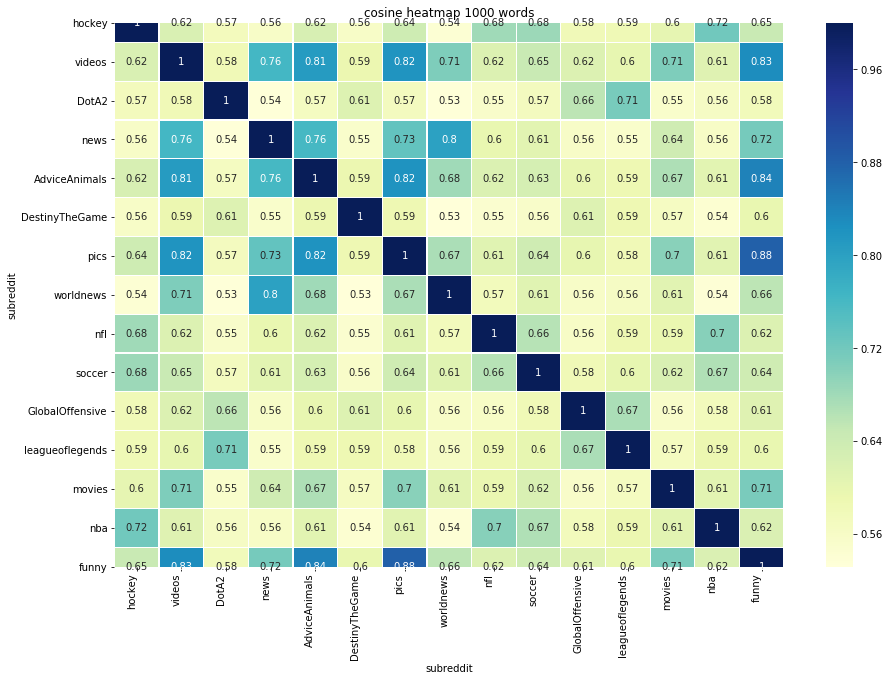

In [107]:
ticks = top1000_words_subreddits_np[:,0] #names of subreddits taken from first column of the array
plt.subplots(figsize=(15,10))
heatmap = sns.heatmap(csim , annot=True, linewidth=0.25 , cmap="YlGnBu")
heatmap.set_xticklabels(ticks, rotation=90, horizontalalignment='right')
heatmap.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
heatmap.set_xlabel('subreddit')   
heatmap.set_ylabel('subreddit')
heatmap.set_title('cosine heatmap 1000 words')
plt.show()

Using the new similarity function the results improved slightly better than those obtained in B2.3 . In fact the topic-related subreddits have now an even higher similarity value which underlines better the relation between these topics while at the same time keeping the values for non-topic-related subreddits relatively low e.g <br>
*Gaming* : (League of Legends , DotA2)= 0.71 ( previously 0.59) <br> 
*News* : (news , worldnews) = 0.8 ( previously 0.67 )  <br> 
*Sports* : (NBA , NFL) = 0.7 (previously 0.55)  ; (NBA , hockey ) = 0.72 (previously 0.57 ) <br> 
*Memes* : (funny , pics) = 0.88 ( previously 0.79 ) **highest value of similarity matrix** ; (funny , videos) = 0.83 (previously 0.71 ) <br>
**Hence it's a better idea to use the cosine similarity function for this case**
